In [14]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


## <font color="#FF9900">Запускать нужно два раза подряд</font> (графики не меняют размер после первого)

In [15]:
# np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning)
from time import sleep

plt.rcParams.update({
  'font.size': 15, 
  'figure.figsize' : [25, 13],
  'lines.linewidth' : 2,
  })


In [16]:
titles = ['text-size',	'pat-size',	'time',	'comparisons']


In [17]:
df = pd.DataFrame(columns=titles)
display(df)


,text-size,pat-size,time,comparisons


### Считывание и функции для отрисовки


In [18]:
array_nums = ['10000', '100000']
array_text_types = ['binary', 'quad']
array_pattern_types = ['simple', 'advanced1', 'advanced2', 'advanced3', 'advanced4']
# array_func_names = ['slow', 'kmp1', 'kmp2', 'rk']
array_func_names = ['slow', 'kmp1', 'kmp2', 'rk', 'bm']


map_algos = {}

# Разделяем по размеру
for num in array_nums:
    map_algos[num] = {}
    for text in array_text_types:
        map_algos[num][text] = {}
        for pattern in array_pattern_types:
            map_algos[num][text][pattern] = []
            for name in array_func_names:
              map_algos[num][text][pattern].append(pd.read_csv(
                  f'tests/size{num}/{name}_{text}_{pattern}_{num}.csv', sep=';'))

map_algos['10000']['binary']['simple'][0]


,text-size,pat-size,time,comparisons
0,10000,100,100420.000000,20087.0
1,10000,200,99050.000000,19969.0
2,10000,300,96695.000000,19861.0
3,10000,400,91815.000000,19744.0
4,10000,500,107928.333333,19612.0
5,10000,600,105870.000000,19493.0
6,10000,700,89450.000000,19405.0
7,10000,800,88633.333333,19303.0
8,10000,900,88781.666667,19201.0
9,10000,1000,85908.333333,19093.0


In [19]:
import matplotlib.ticker as ticker

def plotTestsTimeComps(num: str, text_type: str, pattern_type: str):
  fig, axs = plt.subplots(nrows= 1 , ncols= 2)
  fig.suptitle(f'All algorithms; Text size is <{num}>, Text type is <{text_type}>, Pattern type is <{pattern_type}>')

  i = 0
  param = 'time'
  for item in map_algos[num][text_type][pattern_type]:
    item.plot(ax=axs[0], x='pat-size', y=param, xlabel='pattern size', ylabel='nanoseconds',
                  title=f'Graphs with algorithm {param}', label=array_func_names[i])
    i += 1
  axs[0].legend()

  i = 0
  param = 'comparisons'
  for item in map_algos[num][text_type][pattern_type]:
    item.plot(ax=axs[1], x='pat-size', y=param, xlabel='pattern size', ylabel='comparisons',
                  title=f'Graphs with algorithm {param}', label=array_func_names[i])
    i += 1
  axs[1].legend()

  # axs[0].xaxis.set_major_locator(ticker.MultipleLocator(300))
  # axs[1].xaxis.set_major_locator(ticker.MultipleLocator(300))
  
  plt.show()

### <font color="#60BBD0">Все алгоритмы</font>
n - размер текста и m - размер паттерна
1. slow - Наивный алгоритм с асимптотикой O((n - m) * m)
2. kmp1 - обычный алгоритм Кнута-Морриса-Пратта (КМП) с асимптотикой O(m + n)
3. kmp2 - алгоритм Кнута-Морриса-Пратта (КМП) с использованием утончённых граней с асимптотикой O(m + n)
4. rk   - алгоритм Рабина-Карпа (Хэш-функция) с асимптотикой O((n - m + 1) * m)
5. bm   - алгоритм Бойера-Мура (таблицы суффиксов) с асимптотикой в лучшем случае O(n/m), в среднем O(n + m) и худшем случае O(n * m) из-за чего алгоритм сильно колбасит)

In [20]:
# алгоритм Бойера-Мура очень страшный и часто портит графики, поэтому можно убрать комментирий со следующей строки, чтобы убрать bm алгоритм

##### Size - 10000 и 100000; Text - Binary; Pattern - Simple


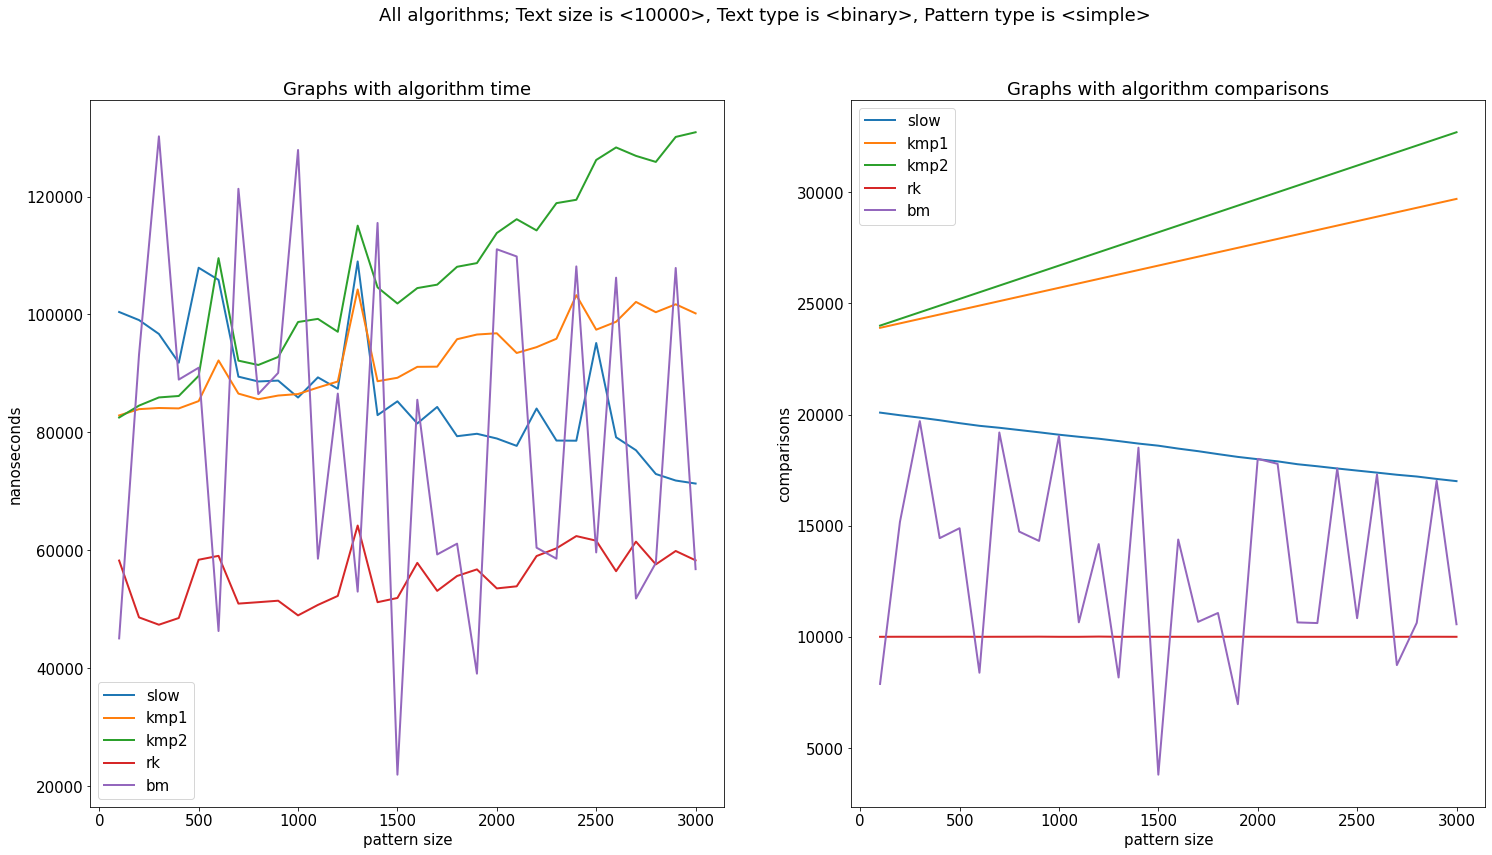

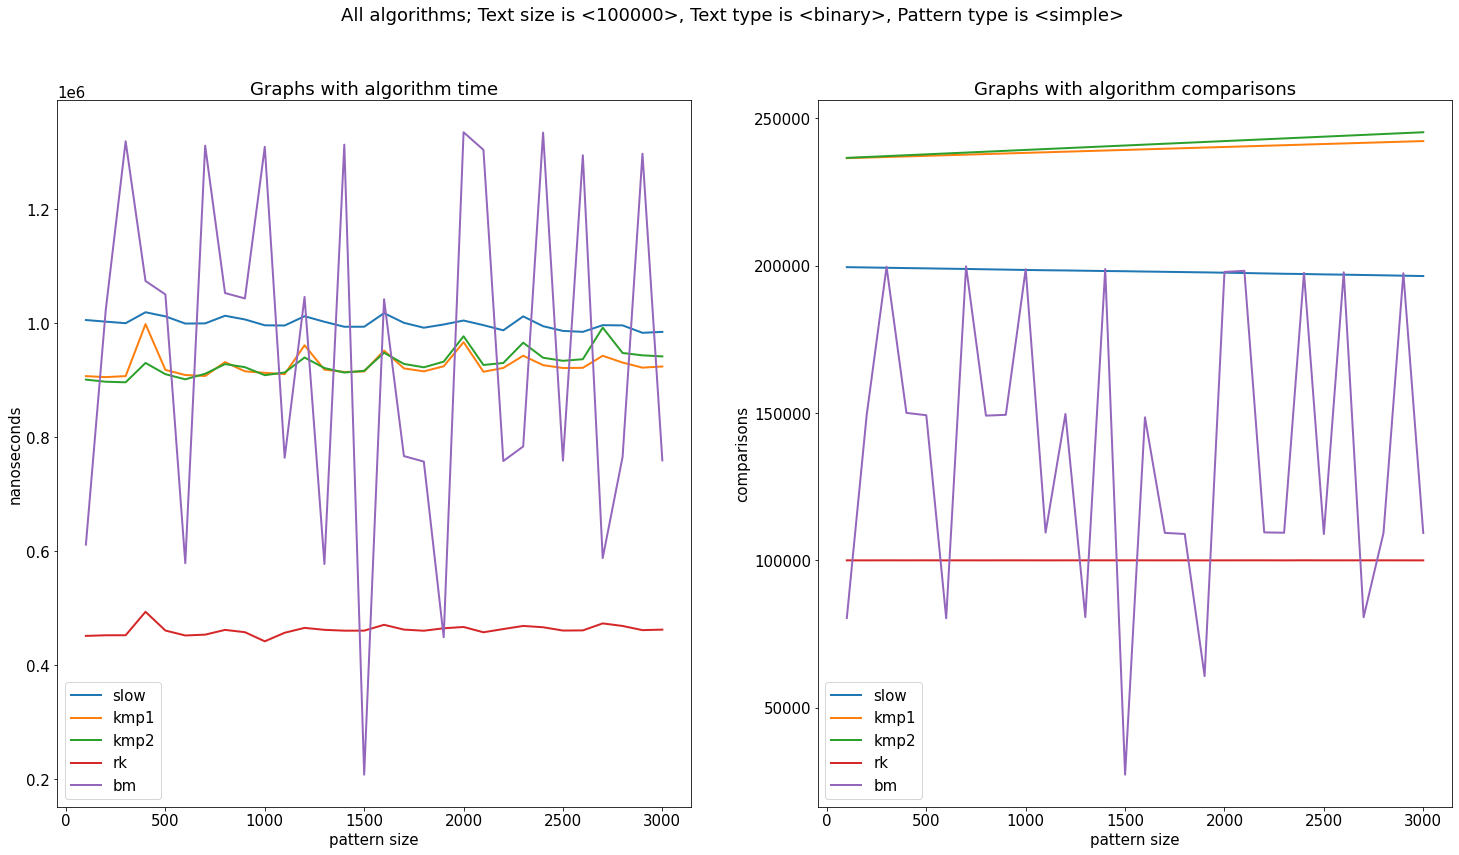

In [21]:
plotTestsTimeComps('10000', 'binary', 'simple')
plotTestsTimeComps('100000', 'binary', 'simple')

##### <font color="#FF6600">Вывод:</font>
* Можно заметить выбросы при text size = 10000 и pattern size = 600 и 1200, но их мы можем наблюдать у всех алгоритмов, следовательно они связаны с генерацией строк и паттернов.

* Поначалу наивный (slow) алгоритм медленнее всех, но затем он обгоняет оба kmp из-за того, что pattern size очень большой и составляет от 1% до 30%. И он будет просто прерываться на break при несовпадении символов.

* Алгоритмы КМП (kmp1 и kmp2) могут работать медленно при очень большой длине паттерна из-за сложности вычисления префикс-функции и возможных ненужных сравнений символов. В таких случаях, другие алгоритмы, такие как алгоритм Рабина-Карпа или алгоритм Бойера-Мура, могут быть более эффективными в поиске подстроки (особенно сравнивая с kmp2).

* Так как алгоритм Рабина-Карпа основан на хешировании и сравнении хеш-значений подстроки и "окон" текста, то он запросто обходит все другие алгоритмы по скорости работы.

* Алгоритм Бойера-Мура хорошо себя проявляет при большом алфавите, поэтому при бинарном он работает не так хорошо, хотя порой обгоняет РК.

* Количество проделанных сравнений полностью олицетворяет затраченное время (особенно алгоритм БМ)

##### Size - 10000 и 100000; Text - Quad; Pattern - Simple


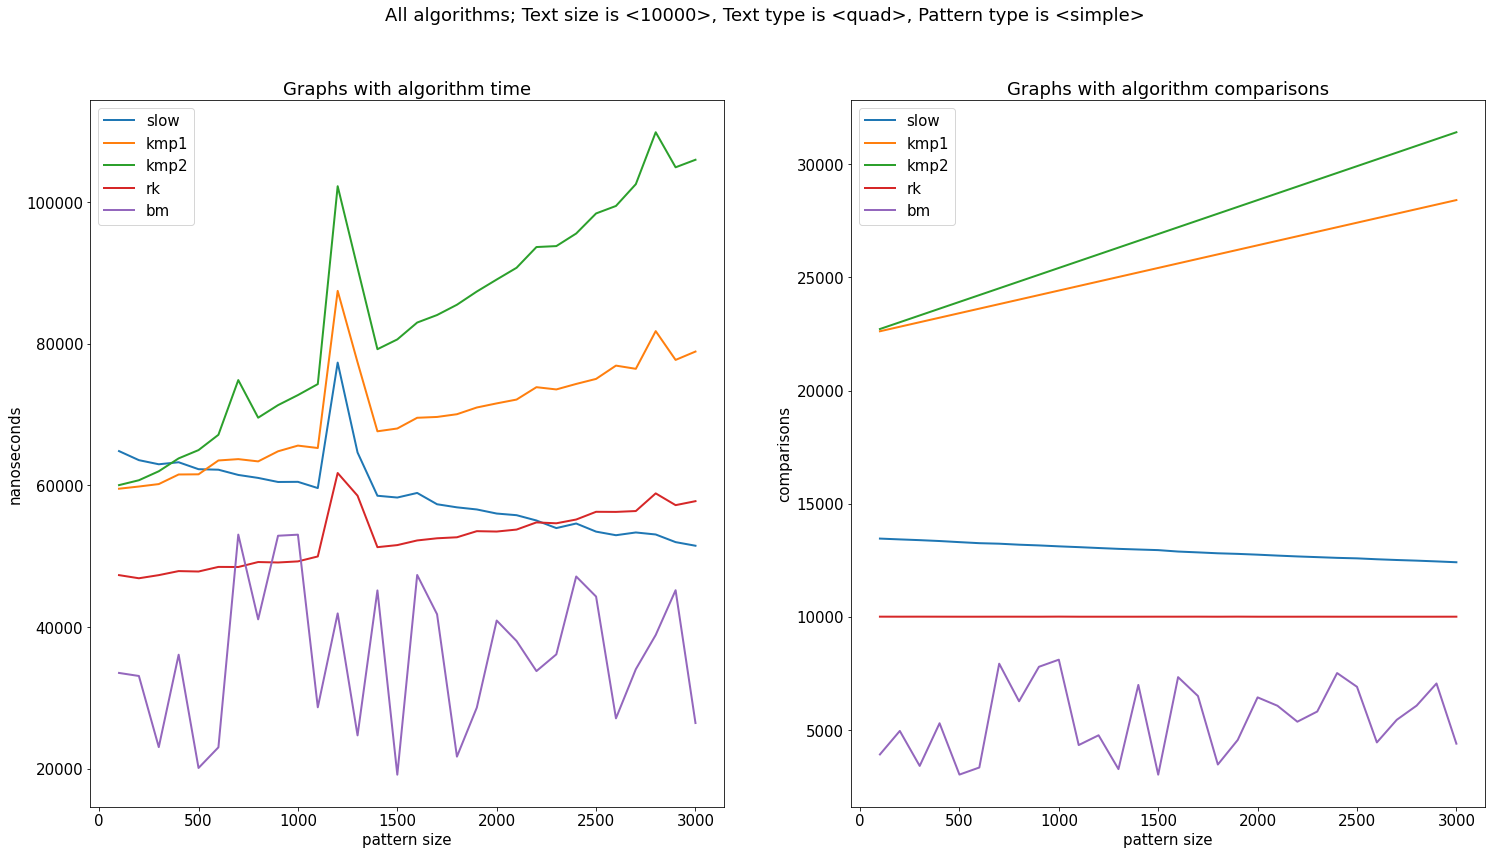

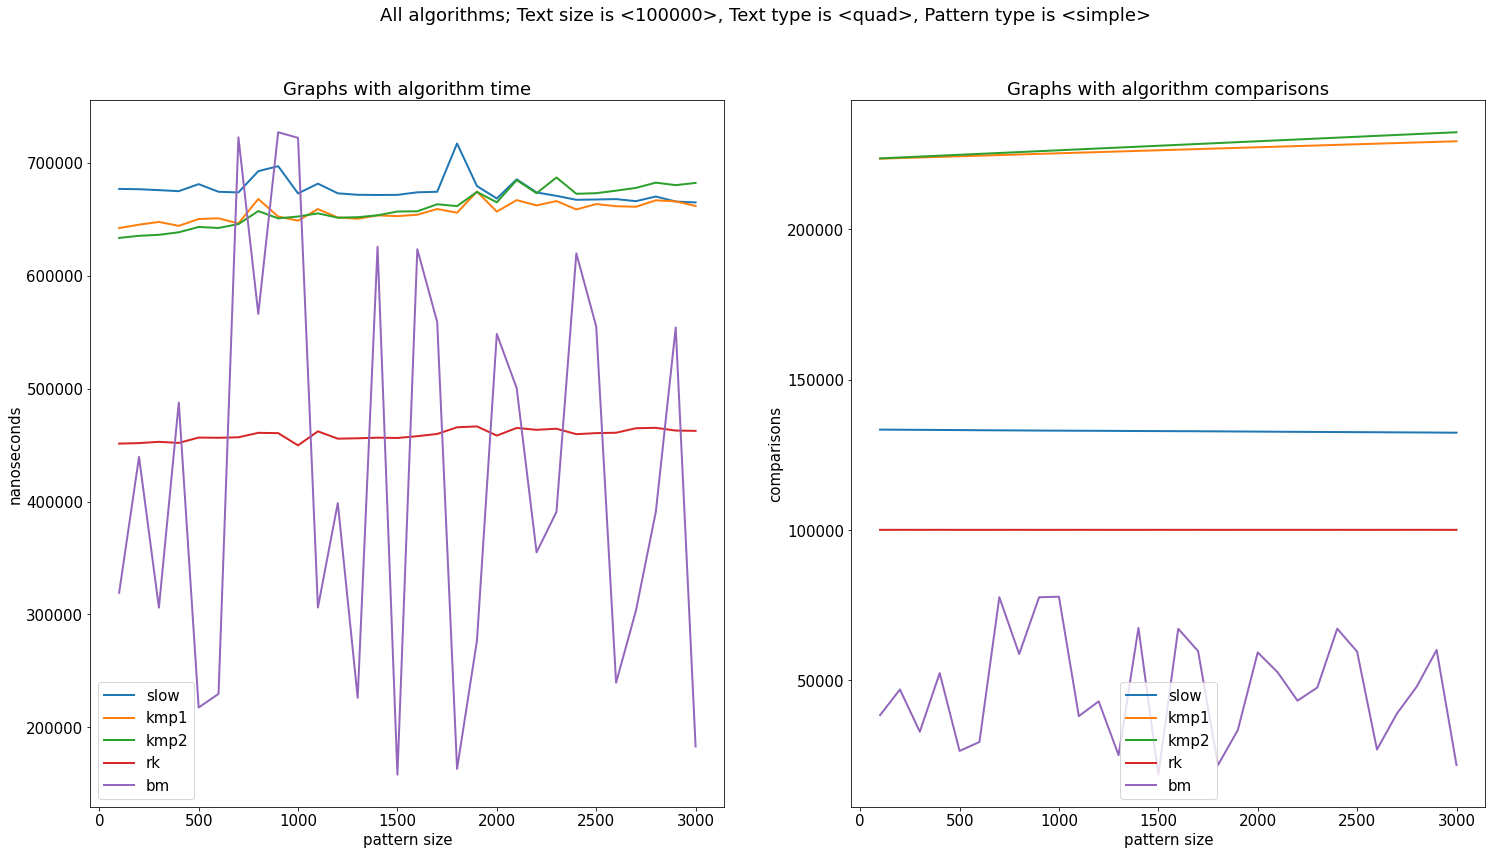

In [22]:
plotTestsTimeComps('10000', 'quad', 'simple')
plotTestsTimeComps('100000', 'quad', 'simple')


##### <font color="#FF6600">Вывод:</font>
* Выброс при pattern size = 1200 связан с генерацией такой строки и паттерна.

* Все алгоритмы, кроме БМ, ведут себя также, как и раньше. 

* Алгоритм Бойера-Мура лучше себя проявил при бОльшем алфавите и обогнал РК.

* Количество проделанных сравнений полностью олицетворяет затраченное время (особенно алгоритм БМ)

##### Size - 10000; Text - Binary; Pattern - Advanced
advanced1 - 1 символ подстановки <br/>
advanced2 - 2 символа подстановки <br/>
advanced3 - 3 символа подстановки <br/>
advanced4 - 4 символа подстановки <br/>


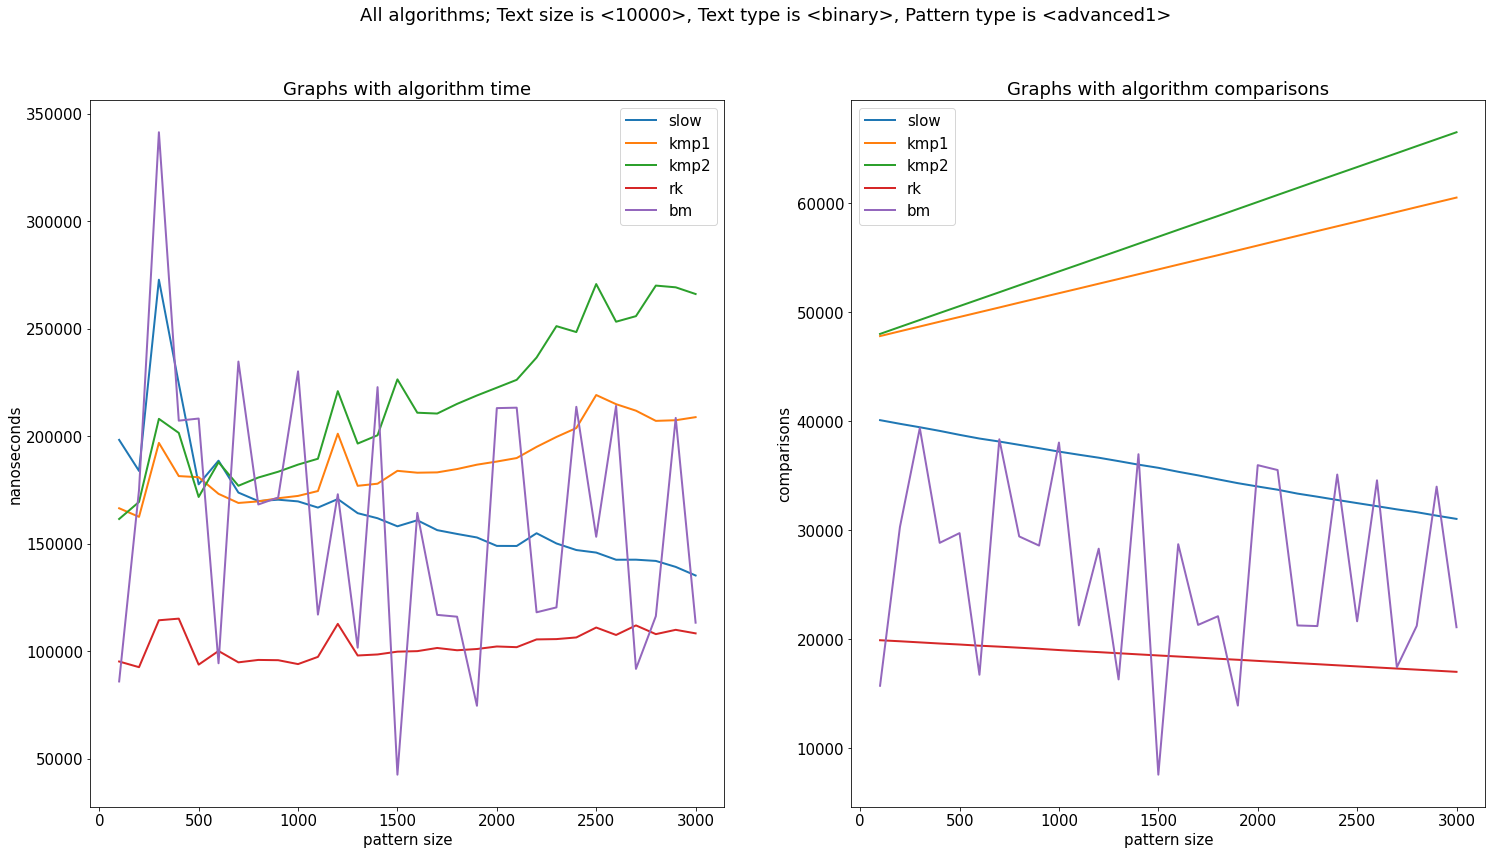

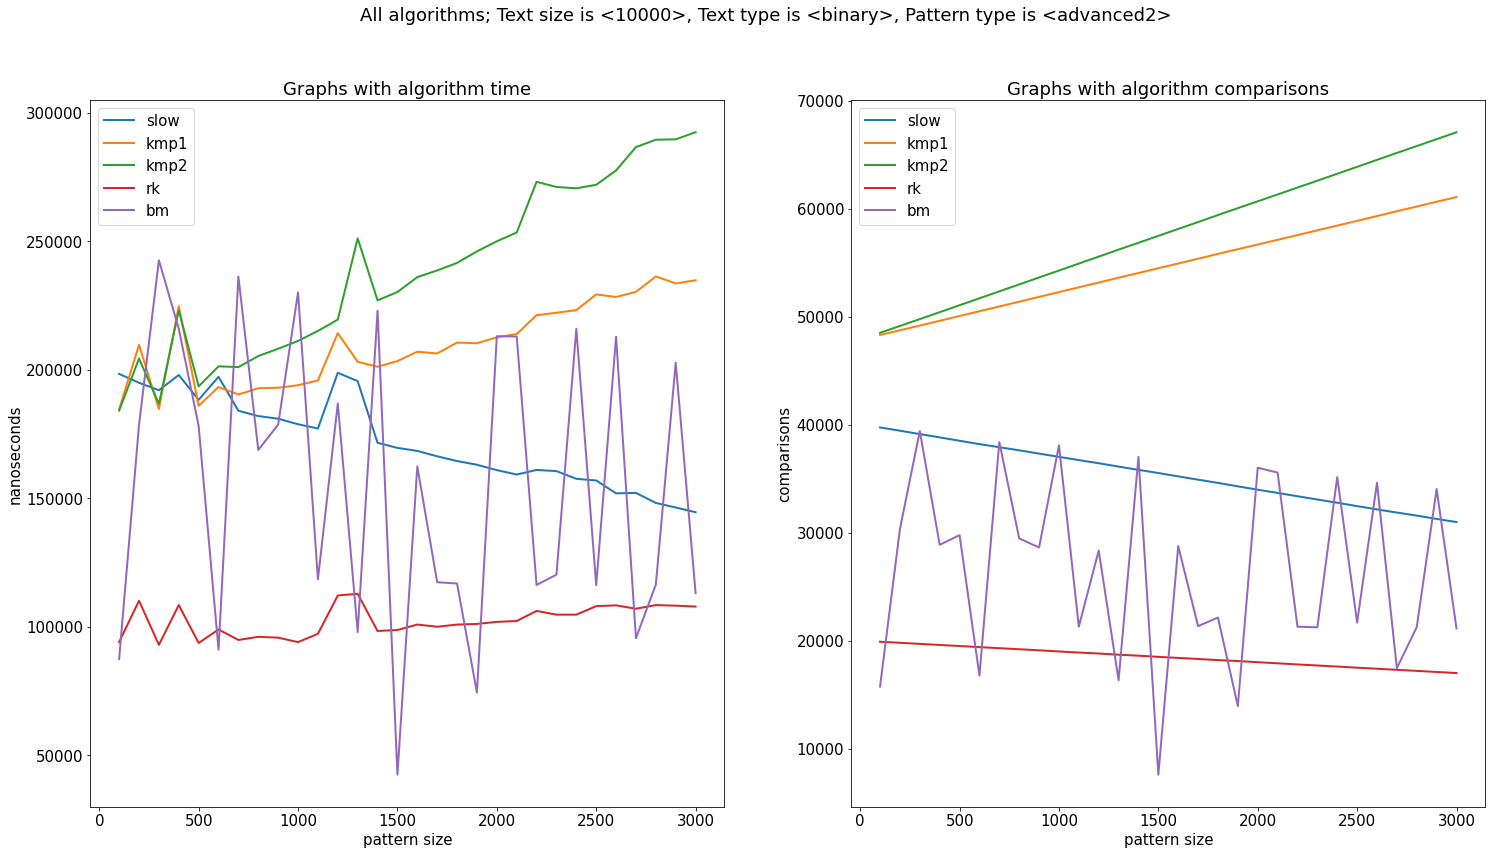

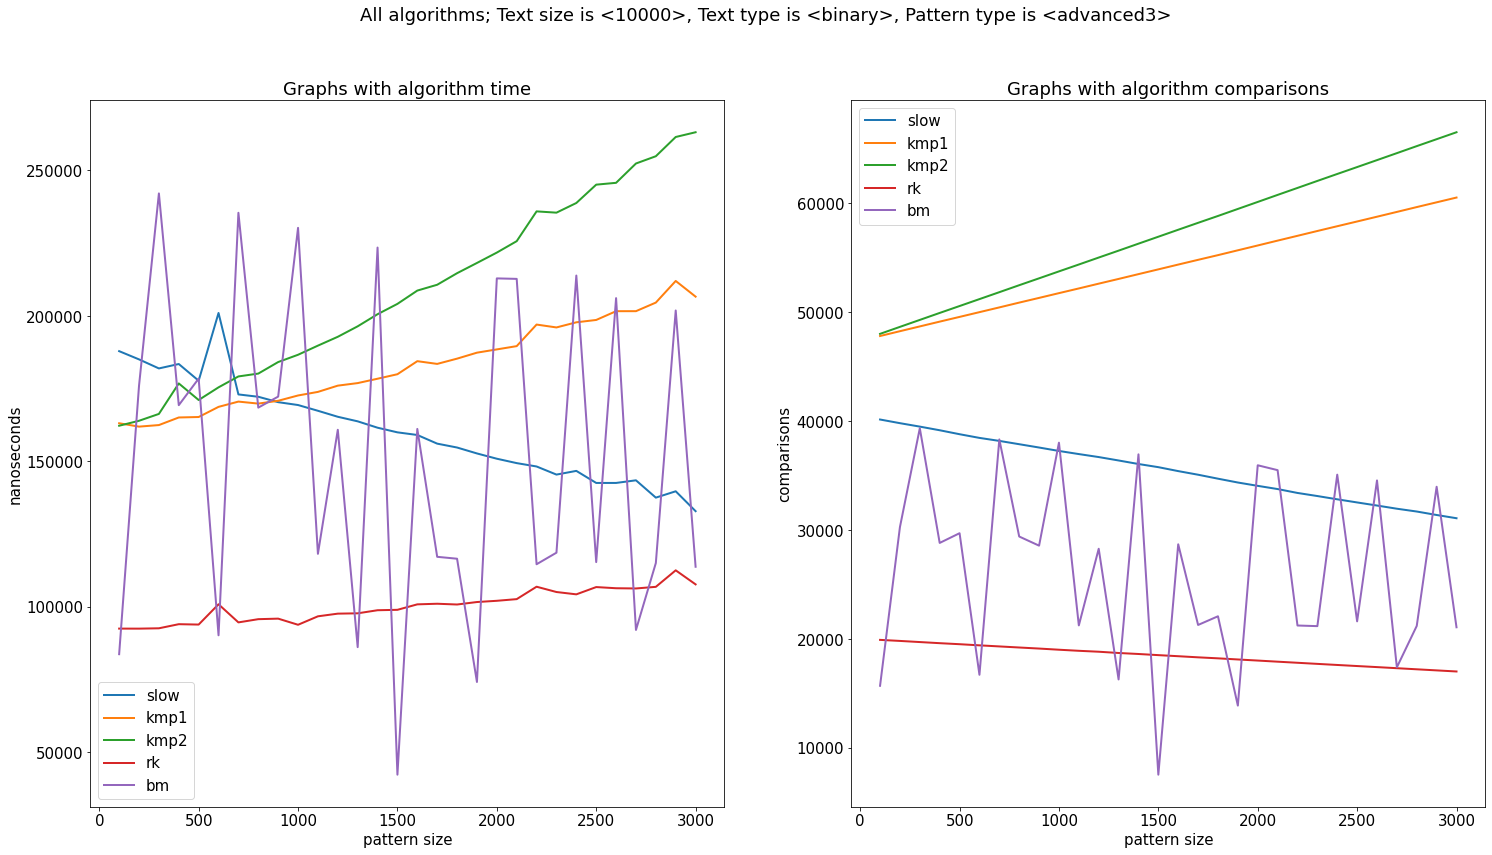

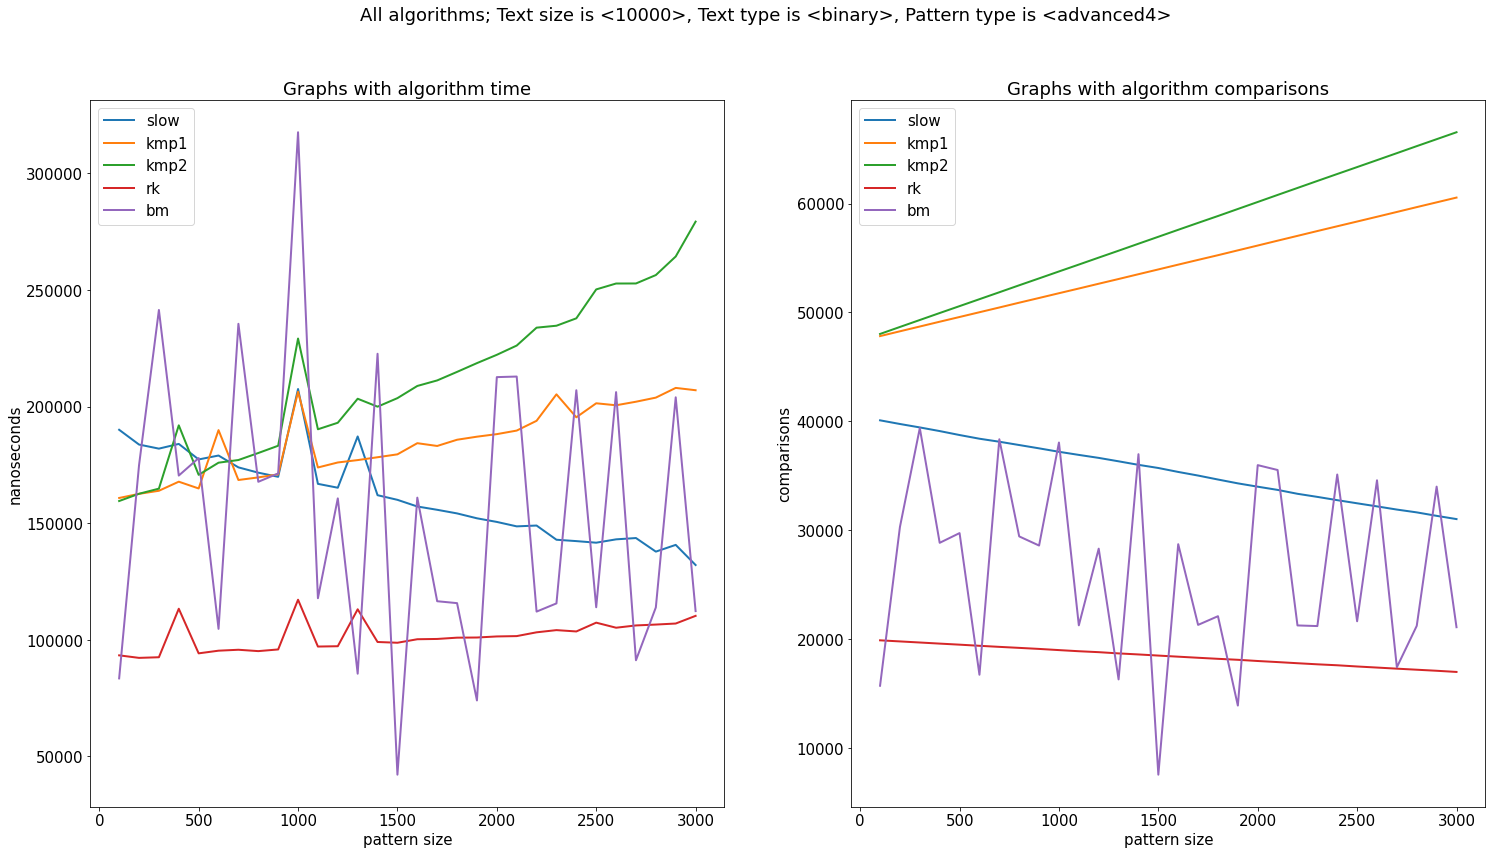

In [23]:
plotTestsTimeComps('10000', 'binary', 'advanced1')
plotTestsTimeComps('10000', 'binary', 'advanced2')
plotTestsTimeComps('10000', 'binary', 'advanced3')
plotTestsTimeComps('10000', 'binary', 'advanced4')


##### <font color="#FF6600">Вывод:</font>
* Можно заметить выбросы при pattern size = 300 на первом, 1200 на втором и 1000 на четвёртом, но их мы можем наблюдать у всех алгоритмов, следовательно они связаны с генерацией строк и паттернов.

* Буквально 4 одинаковых графика (не считая выбросы БМ алгоритма)

* БМ на бинарном алфавите всё также плох.

* РК как всегда стабилен и хорош)

* КМПшки как всегда с увеличением размера паттерна работают всё медленнее.

##### Size - 10000; Text - Quad; Pattern - Advance


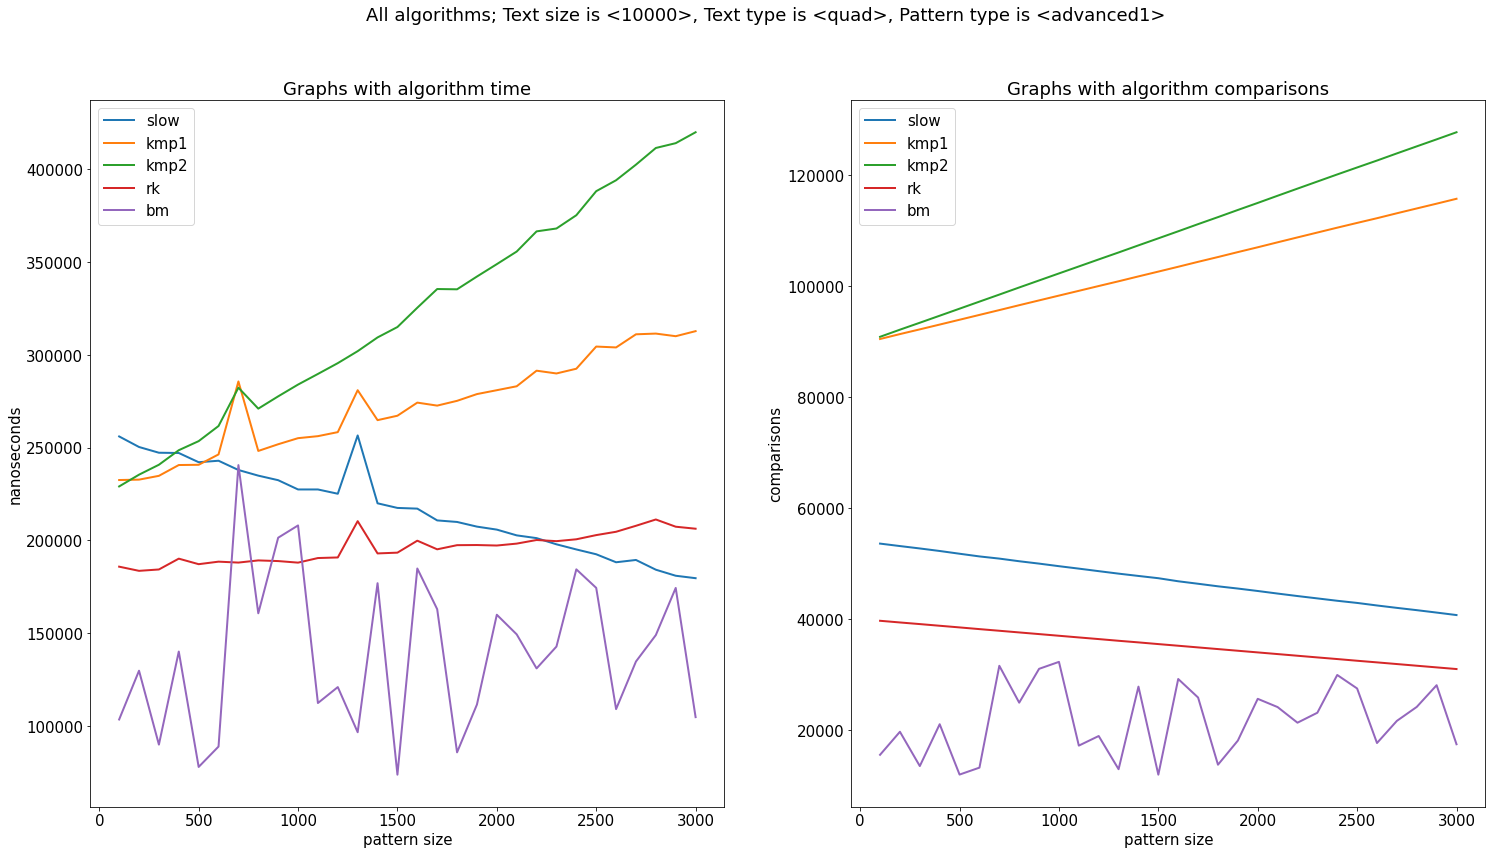

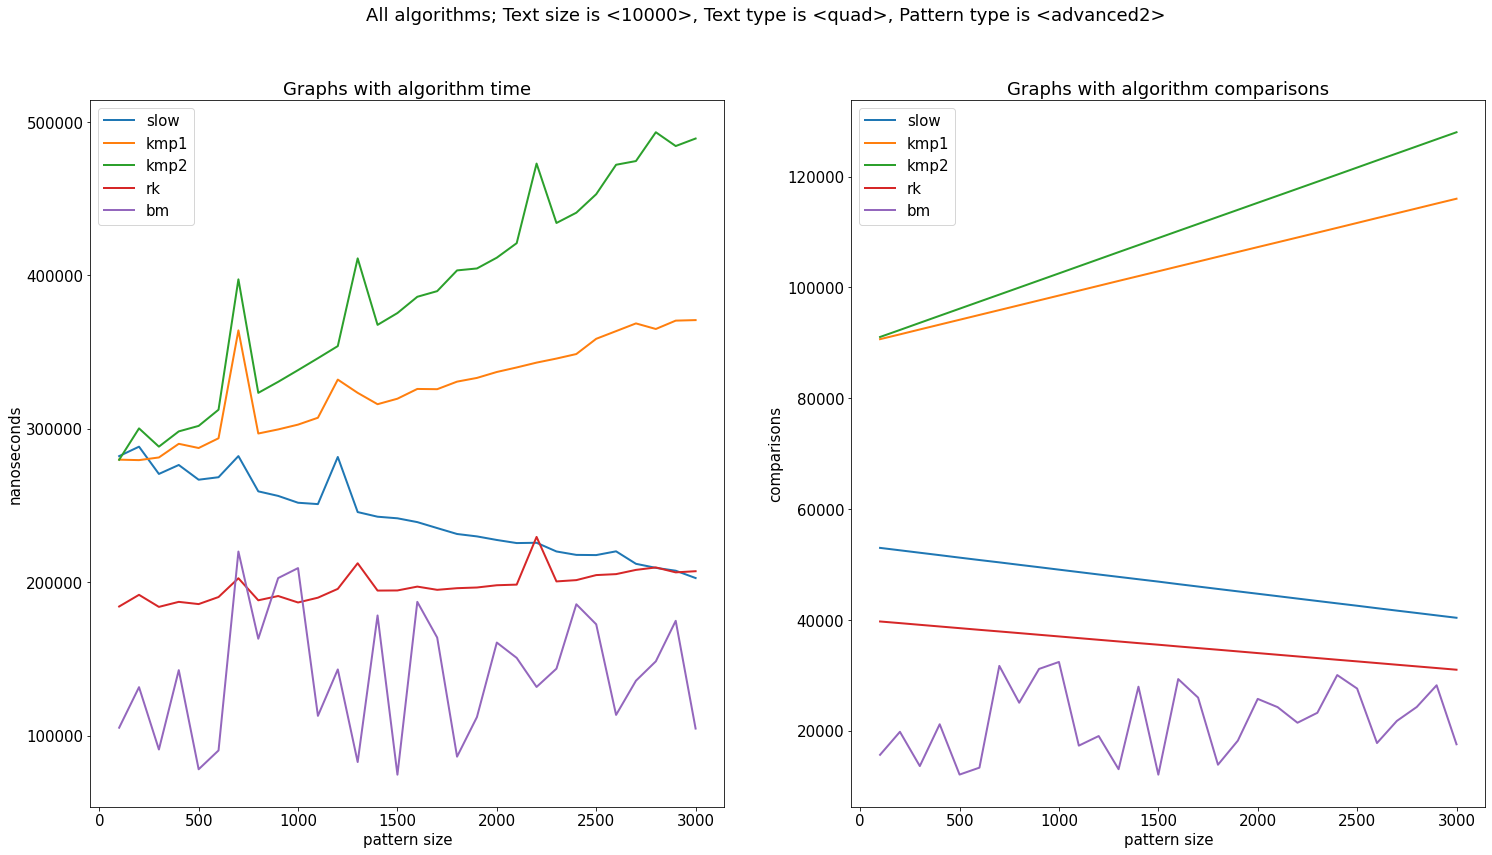

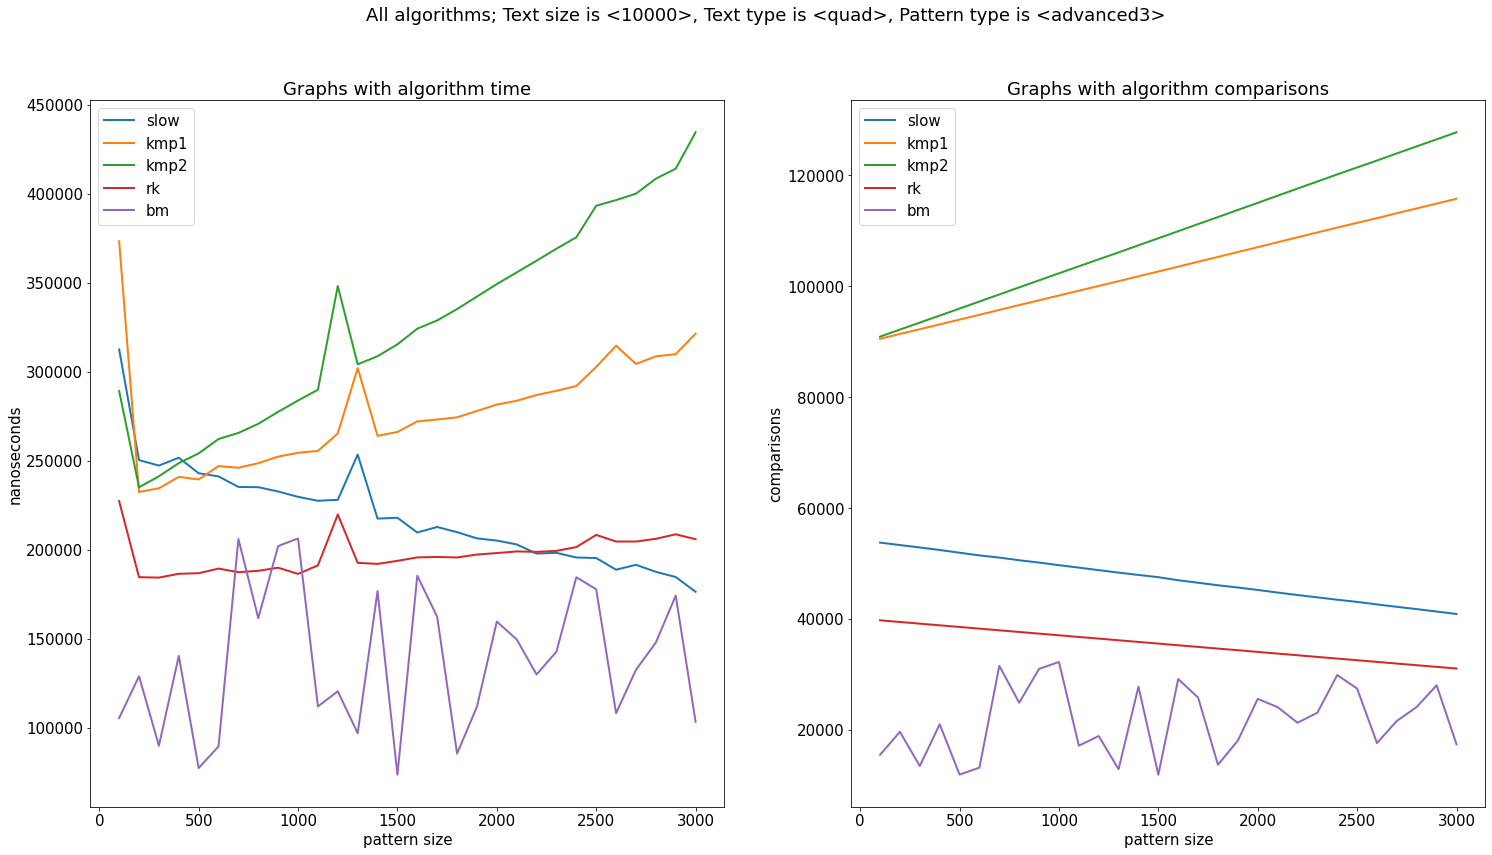

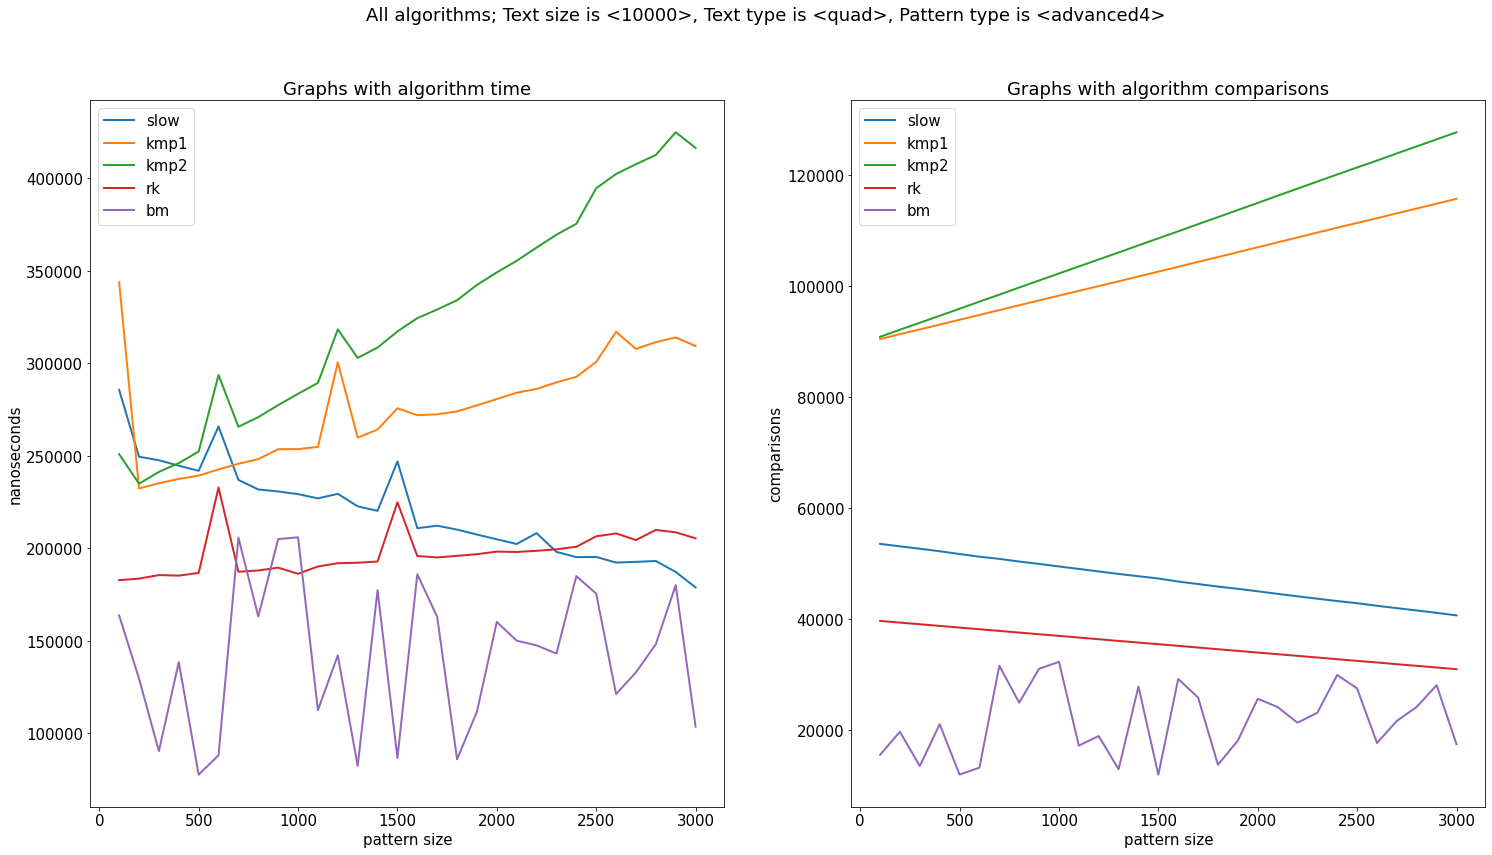

In [24]:
plotTestsTimeComps('10000', 'quad', 'advanced1')
plotTestsTimeComps('10000', 'quad', 'advanced2')
plotTestsTimeComps('10000', 'quad', 'advanced3')
plotTestsTimeComps('10000', 'quad', 'advanced4')


##### <font color="#FF6600">Вывод:</font>
* Можно заметить выбросы при pattern size = 700 на первом и втором, 1200 на третьем и несколько на четвёртом, но их мы можем наблюдать у всех алгоритмов, следовательно они связаны с генерацией строк и паттернов.

* Теперь 4 абсолютно одинаковых графика

* БМ на бОльшем алфавите стал лучше РК.

* КМПшки как всегда с увеличением размера паттерна работают всё медленнее.

##### Size - 100000; Text - Binary; Pattern - Advance


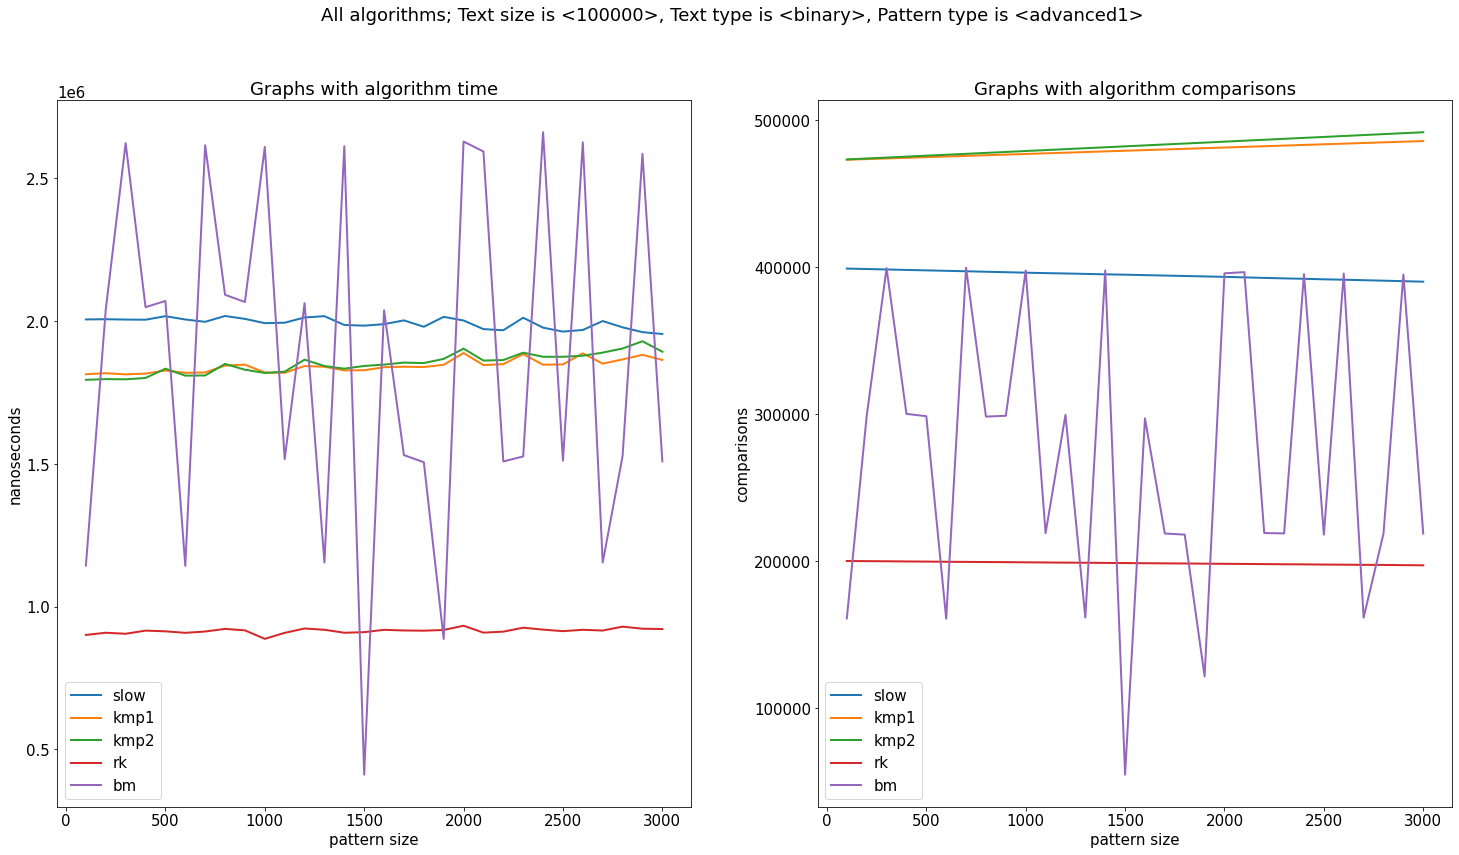

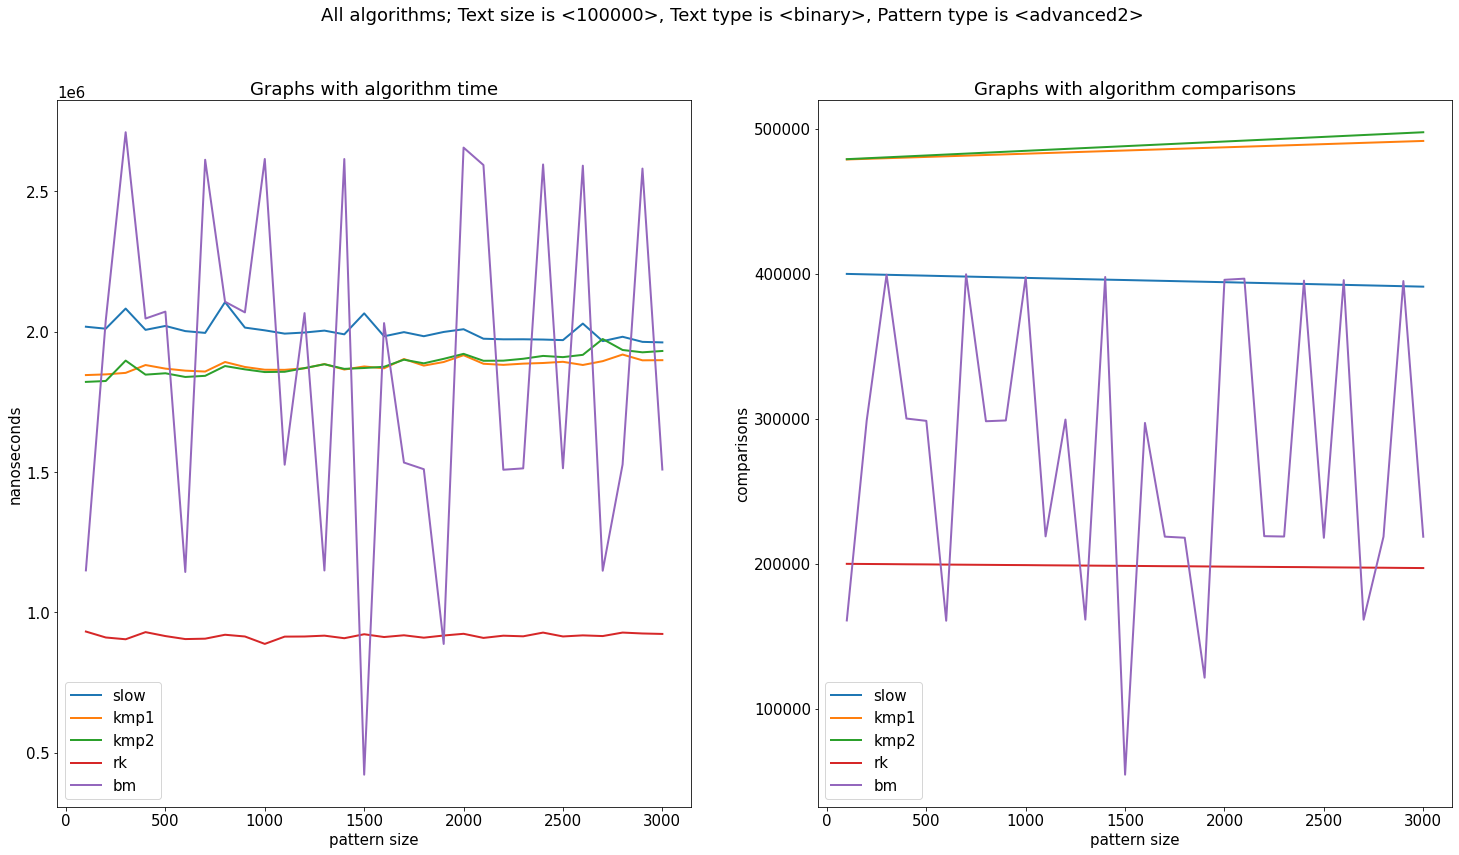

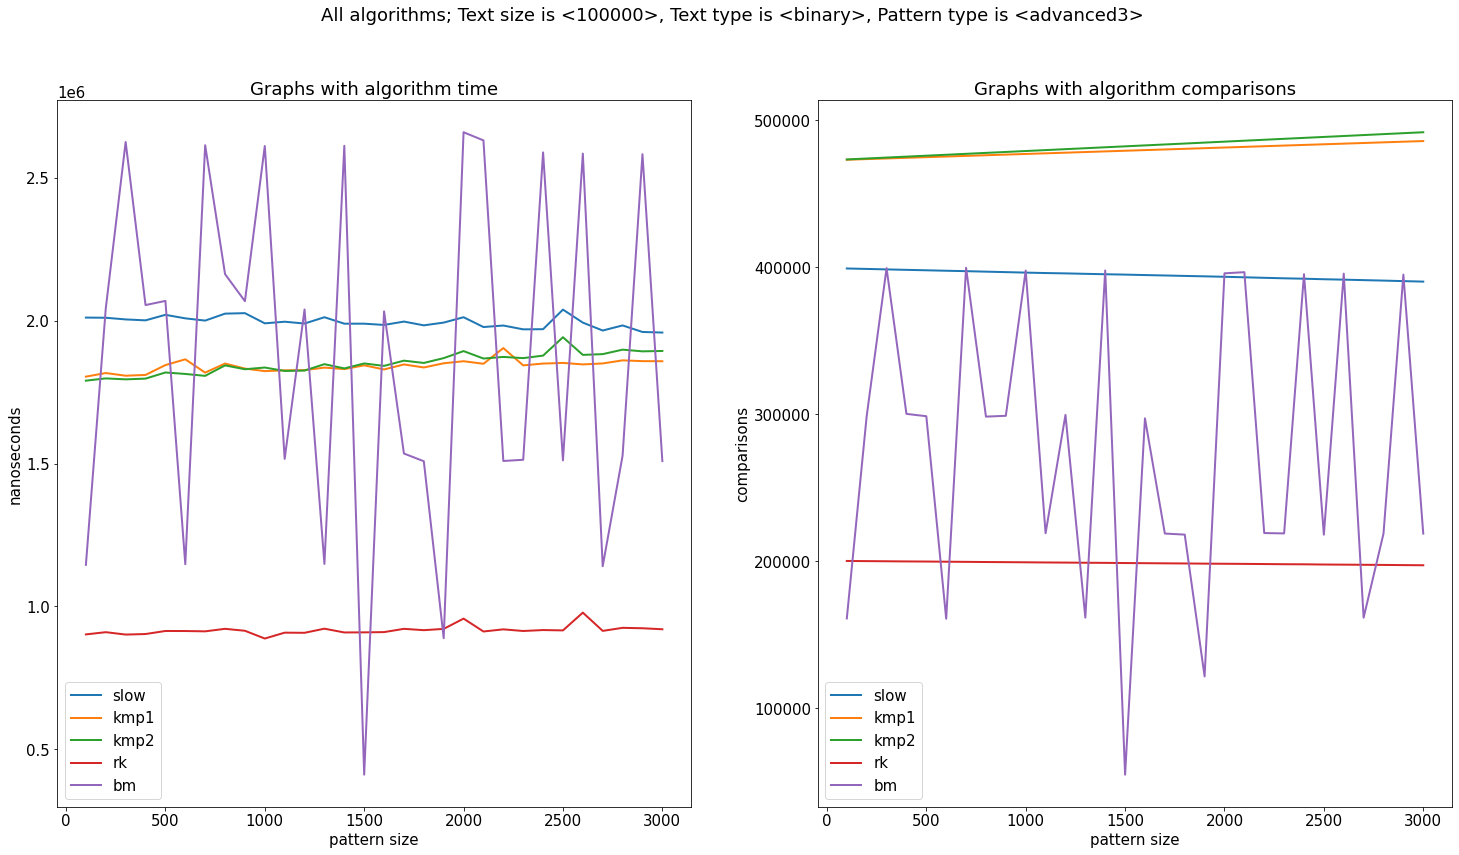

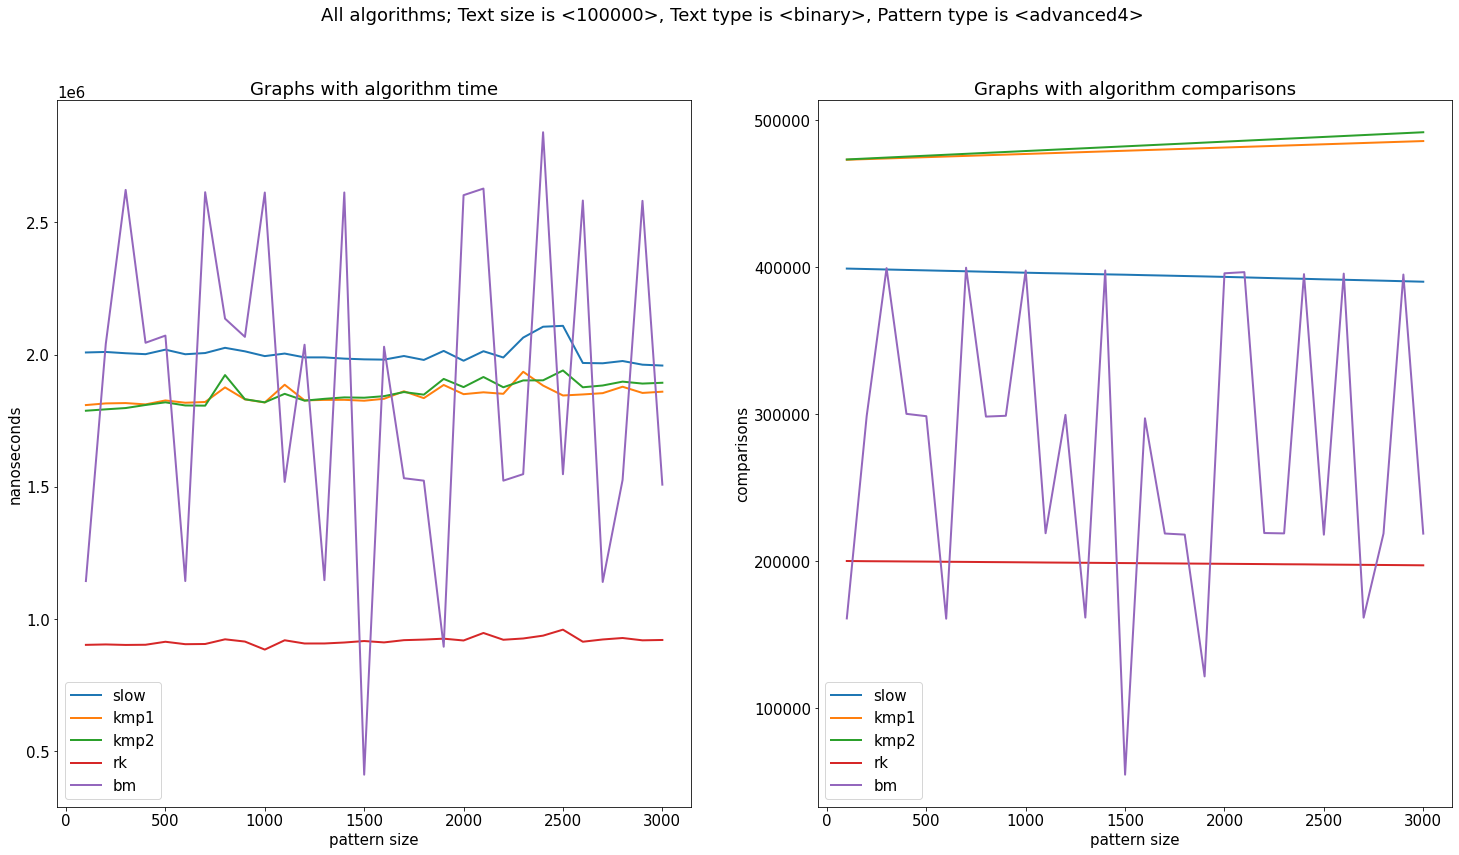

In [25]:
plotTestsTimeComps('100000', 'binary', 'advanced1')
plotTestsTimeComps('100000', 'binary', 'advanced2')
plotTestsTimeComps('100000', 'binary', 'advanced3')
plotTestsTimeComps('100000', 'binary', 'advanced4')


##### <font color="#FF6600">Вывод:</font>
* Заметные выбросы не были обнаружены из-за большого размера строк.

* Буквально 4 одинаковых графика (не считая выбросы БМ алгоритма)

* БМ на бинарном алфавите всё также плох.

* РК как всегда стабилен и хорош)

* КМПшки на всём промежутке работают быстрее наивного алгоритма.

##### Size - 100000; Text - Quad; Pattern - Advance


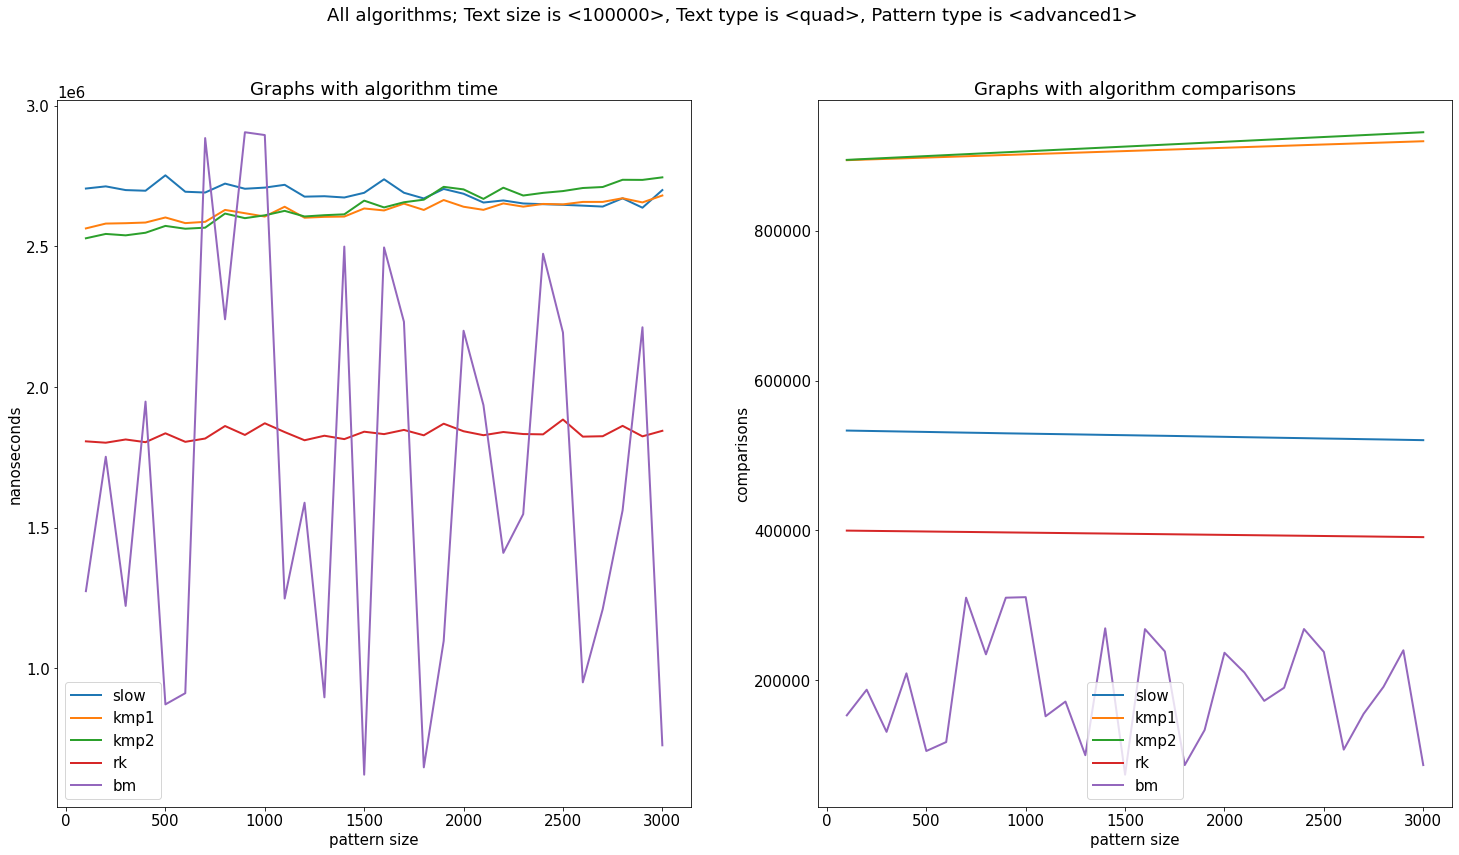

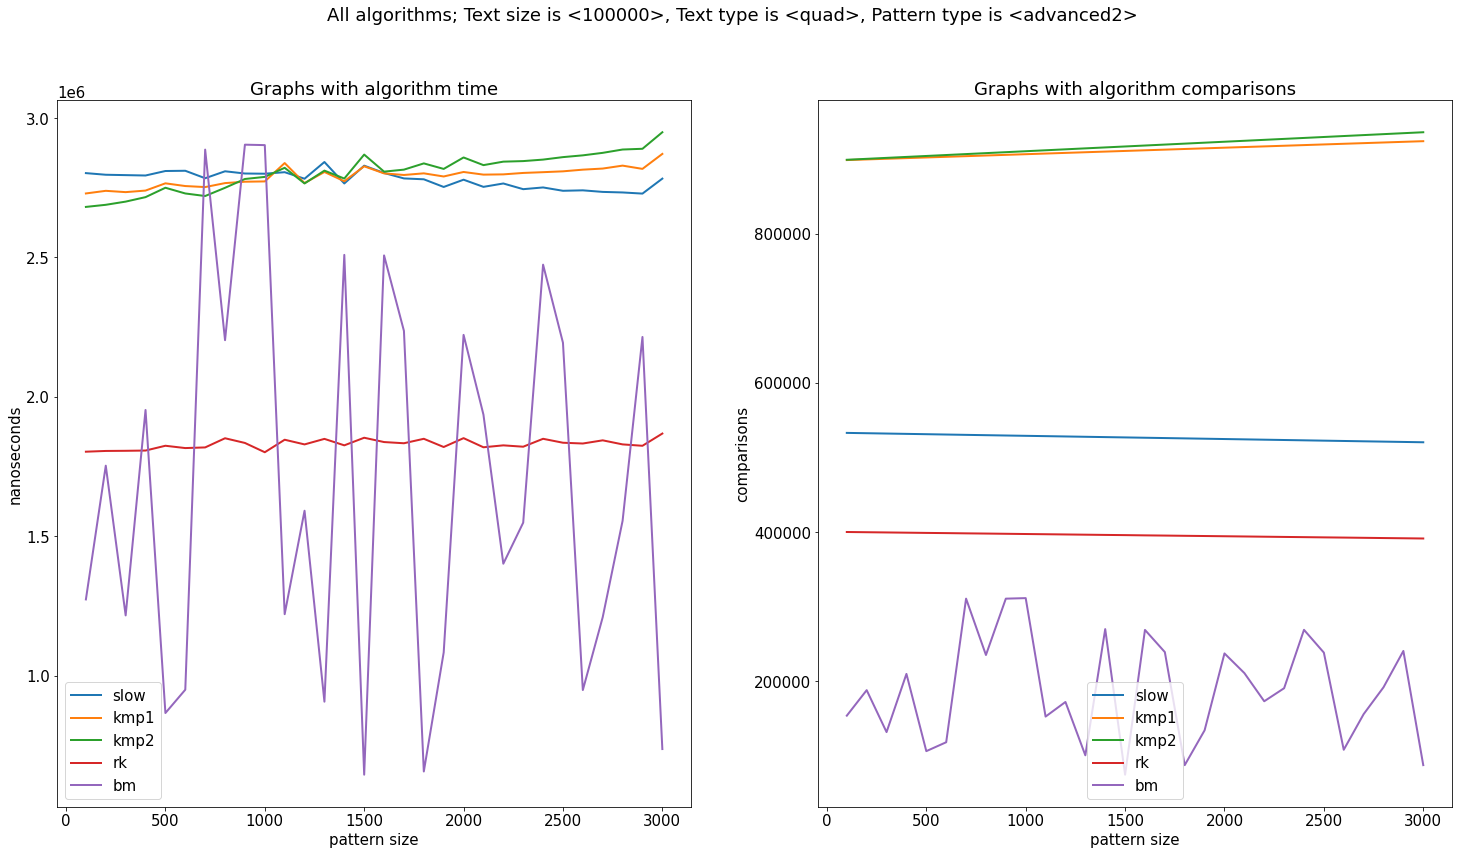

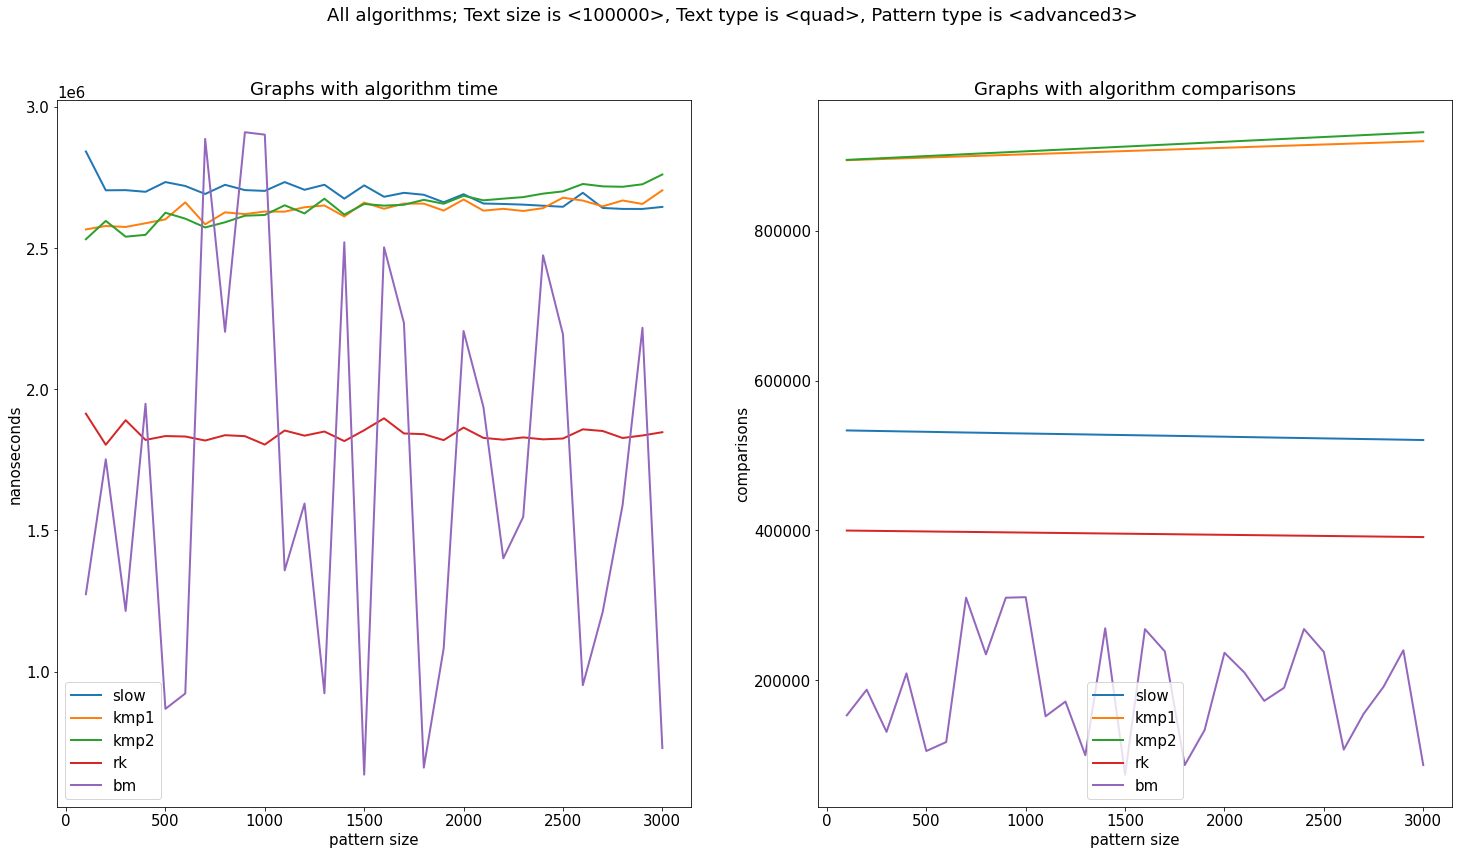

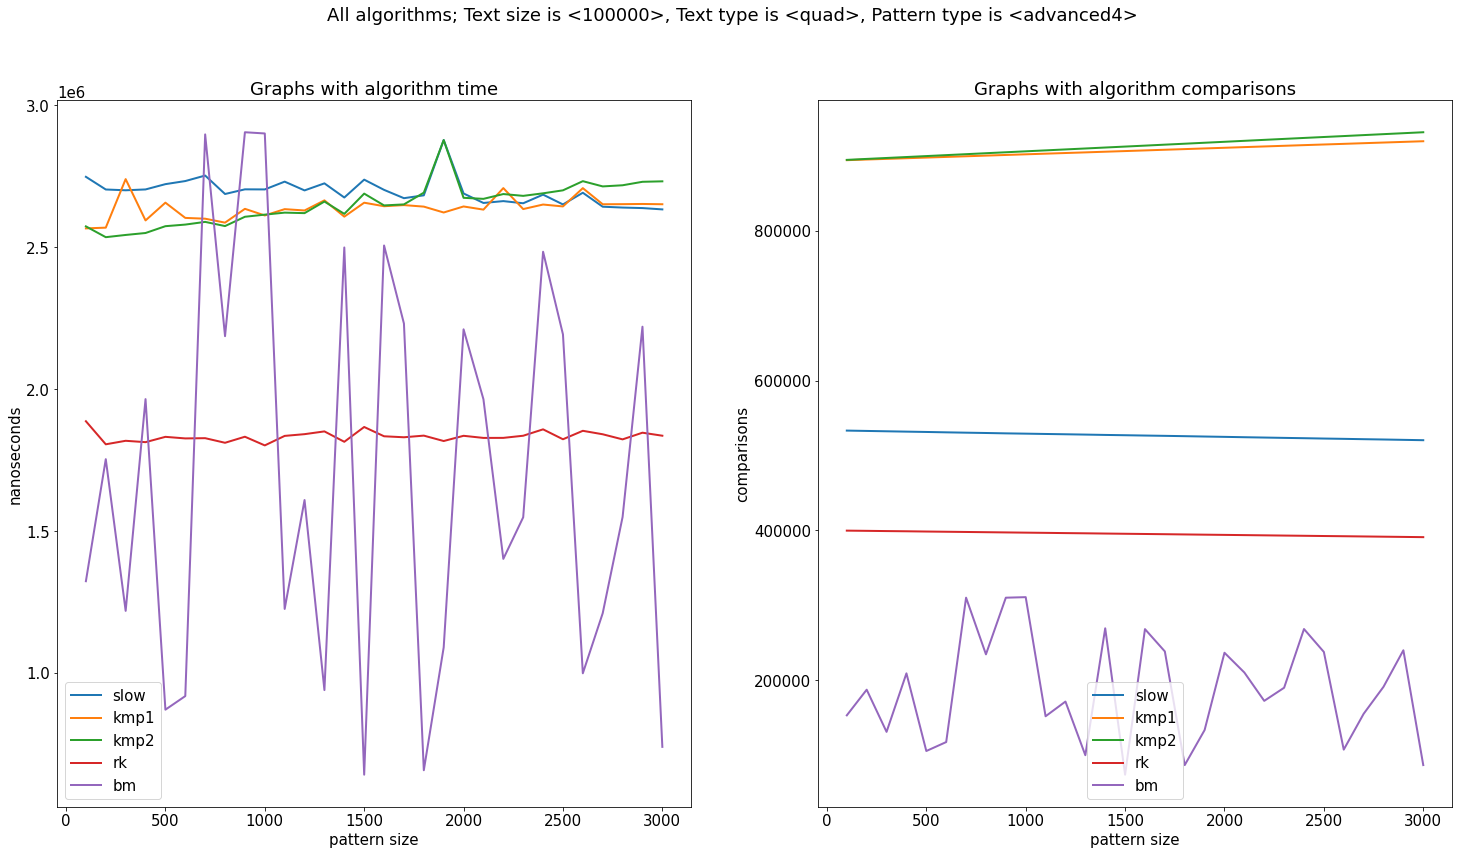

In [26]:
plotTestsTimeComps('100000', 'quad', 'advanced1')
plotTestsTimeComps('100000', 'quad', 'advanced2')
plotTestsTimeComps('100000', 'quad', 'advanced3')
plotTestsTimeComps('100000', 'quad', 'advanced4')


##### <font color="#FF6600">Вывод:</font>
* Заметные выбросы не были обнаружены из-за большого размера строк.

* 4 абсолютно одинаковых графика

* БМ на бОльшем алфавите чаще показывает себя лучше РК.

* КМПшки с увеличением размера паттерна работают медленнее наивного.

##### <font color="#FFFF00">Итог:</font>
1. Наивный алгоритм работает лучше всего на больших паттернах в небольших строках
2. KMP работает лучше на длинных текстах и коротких подстроках (из-за префикс функции)
3. БМ работает лучше на коротких текстах и длинных подстроках с большим алфавитом.
4. РК Всегда очень хорош и стабилен - лучший алгоритм из рассмотренных (на этих данных)